# MACHINE LEARNING ENGINEER NANODEGREE


# SUPERVISED LEARNING



# PROJECT:Car Evaluation 


GETTING STARTED:
In this project I will employ some classification algorithms mentioned in my proposal to find the best suited classifier
for Car Evaluation dataset donated by Marco Bohanec in 1997 was obtained from the UCI dataset repository.HereI will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data.My goal with this implementation is to construct a model that accurately predicts the best classifier with good accuracy better than benchmark model.
Therefore, a reasonable evaluation method is equally important for car consumers(buyers) and producers. It can not only reduce the burden on dealers, but also increase sales. In addition, it plays a strategic role, can improve customer service levels in a highly competitive market environment.

This data is downloaded from https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

EXPLORING DATA:
Running the below code cell will load necessary Python libraries and load the car evaluation data.The last column from this dataset, "class", will be my target variable. All other columns are features namely buying,maint,doors,persons,lug_boot,safety.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_excel('car_data1.xlsx')


EXPLORATORY DATA ANALYSIS:
It is an approach to analyzing data sets to summarize their main characteristics,often with visual methods.

In [4]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Get information of dataset and check for null values if any.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 60.8+ KB


As all my columns are categorical, I will check for unique values of each column.

In [6]:
for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


Checking  how these unique categories are distributed among the columns.

In [7]:
for i in data.columns:
    print(data[i].value_counts())
    print()

vhigh    432
low      432
high     432
med      432
Name: buying, dtype: int64

vhigh    432
low      432
high     432
med      432
Name: maint, dtype: int64

5more    432
4        432
2        432
3        432
Name: doors, dtype: int64

4       576
more    576
2       576
Name: persons, dtype: int64

small    576
big      576
med      576
Name: lug_boot, dtype: int64

high    576
med     576
low     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



From the above output, it is clear that all the columns except 'class'(target variable) are distributed equally among data.

Below is the graph which gives the count of unique values in column.

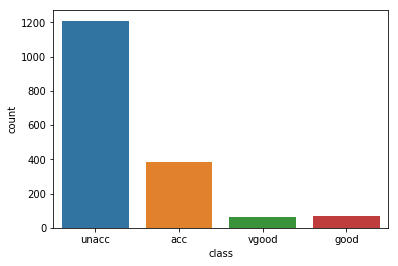

In [8]:
sns.countplot(data['class'])

It can be seen from the graph that the result 'class' is unbalanced with larger values of 'unacc'.
Now this is an unbalanced multiclass classification problem.

I will check how the 'class' is distributed for each of the feature in my data.

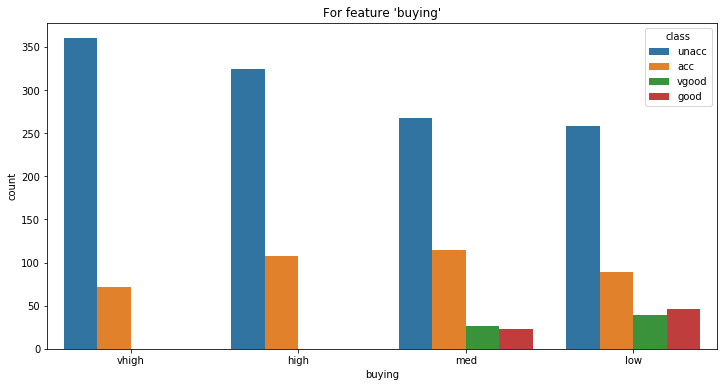

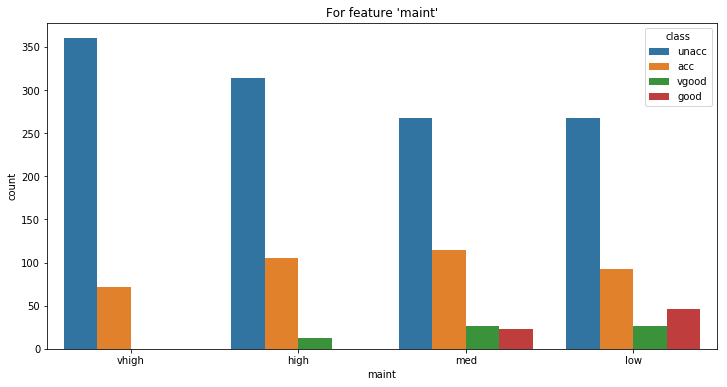

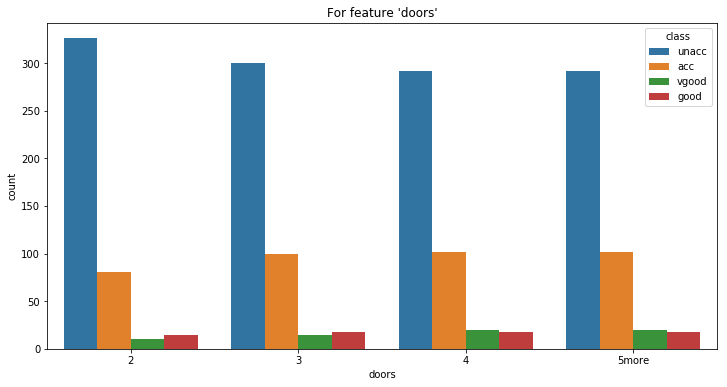

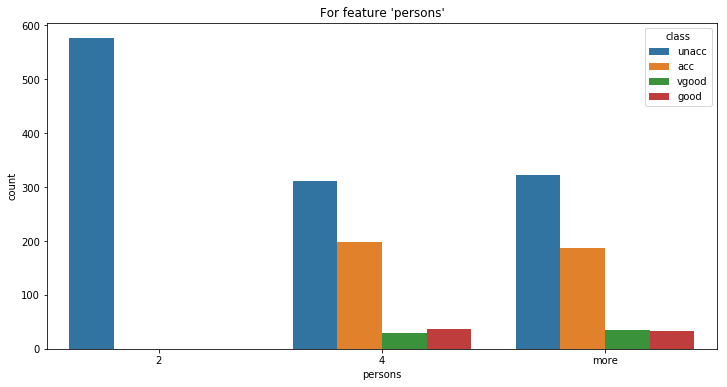

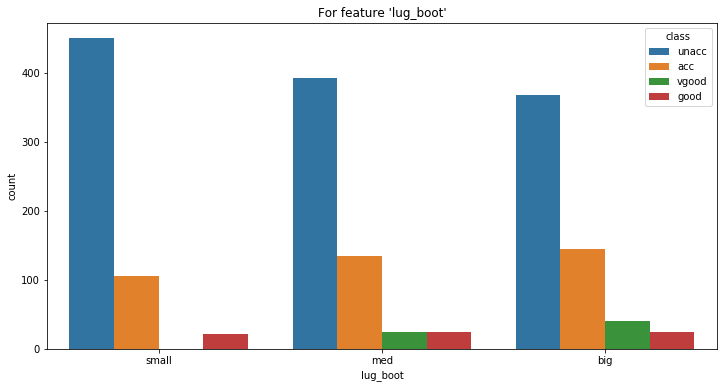

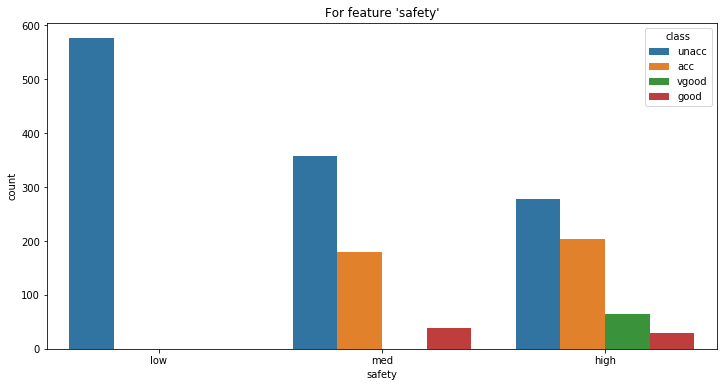

In [9]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['class'])

PREPROCESSING:
Before data can be used as input for machine learning algorithms, it should often must be cleaned, formatted, and restructured — this is typically known as preprocessing. Fortunately, for my dataset, there are no invalid or missing entries we must deal with.

As scikit-learn algorithms do not generally work with string values, I have converted string categories to integers.

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])
data.head()    
    


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


Heatmap is a two-dimensional representation of infomation with the help of colors.Heatmap of the columns on dataset with each other.It shows Pearson's correlation coefficient of column w.r.t other columns.

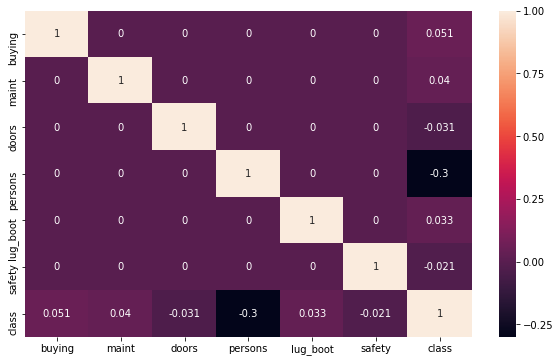

In [12]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

Ignoring the diagonal values, it can be seen that most of the columns shows very weak correlation with 'class' label.'persons' column is showning a weak relation with 'class'.
Other columns except 'class' shows no correlation with each other.

*X is the dataframe containing input data / features
*y is the series which has results which are to be predicted.

In [13]:
X=data[data.columns[:-1]]
y=data['class']
X.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2


Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 70% of the data will be used for training and 30% for testing.
Divide data in train and test sets
Run the code cell below to perform this split.

In [14]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split the 'X' and 'y' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1209 samples.
Testing set has 519 samples.


# MODEL SELECTION:

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
logreg=LogisticRegression(solver='newton-cg',multi_class='ovr',warm_start=[False,bool])
logreg.fit(X_train,y_train)
pred=logreg.predict(X_test)
logreg.score(X_test,y_test)

0.6685934489402697

So, basic logistic regression model is giving very less accuracy. Let's check the learning curves for better visualisation.

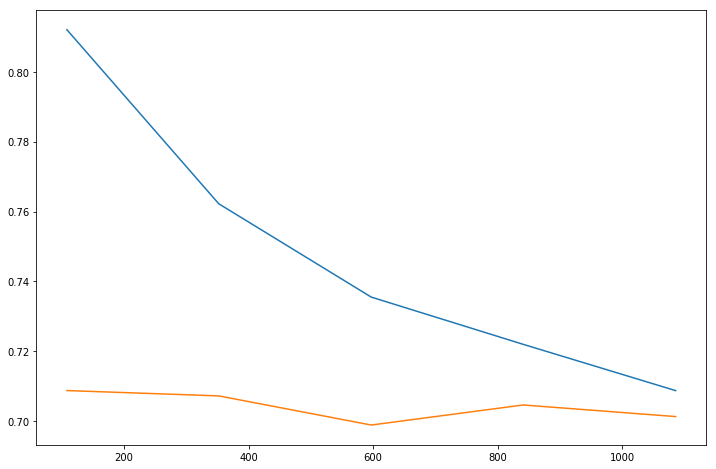

In [17]:
from sklearn.model_selection import learning_curve
lc=learning_curve(logreg,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

From above graph, with the increasing number of samples,train accuracy is decreasing.
I tried modifying regularization parameter.

In [18]:
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
param_range=[0.0001,0.001,0.1,1]
curve=validation_curve(logreg,X_train,y_train,cv=5,param_name='C',param_range=param_range,n_jobs=-1,)
curve

(array([[0.70569948, 0.70423992, 0.70454545, 0.70454545, 0.70454545],
        [0.70569948, 0.70423992, 0.70454545, 0.70454545, 0.70454545],
        [0.70466321, 0.71354705, 0.71384298, 0.71797521, 0.71280992],
        [0.69740933, 0.71664943, 0.7035124 , 0.7107438 , 0.70661157]]),
 array([[0.70081967, 0.70661157, 0.70539419, 0.70539419, 0.70539419],
        [0.70081967, 0.70661157, 0.70539419, 0.70539419, 0.70539419],
        [0.73770492, 0.67355372, 0.70539419, 0.70124481, 0.70954357],
        [0.71721311, 0.66942149, 0.70124481, 0.70539419, 0.70539419]]))

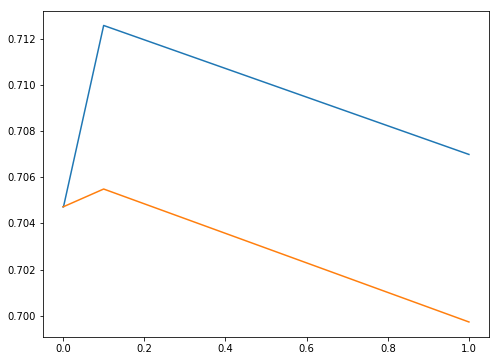

In [19]:
n=len(param_range)
train_score=[curve[0][i].mean() for i in range (0,n)]
test_score=[curve[1][i].mean() for i in range (0,n)]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

It clear that C=0.1 is giving a good result.
Now, as it is a multiclass classification, I tired using 'newton-cg','sag','lgfbs' solvers.
As this dataset is smaller, we can use GridSearch to get best possible parameters

In [21]:
param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'sag'], 'multi_class': ['multinomial']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.7096774193548387


So, with the above parameters, we can get at accuary of 71%.


# KNN CLASSIFIER

As logistic regression didn't give accuracy, I tried KNN classification

In [23]:
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)


0.9017341040462428

So, the default KNN classificaton model is giving an accuracy of 90%

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       118
           1       0.77      0.53      0.62        19
           2       0.93      0.99      0.96       358
           3       1.00      0.50      0.67        24

   micro avg       0.90      0.90      0.90       519
   macro avg       0.88      0.70      0.76       519
weighted avg       0.90      0.90      0.90       519



We will check for 'f1-score'

f1-score is 0.9 which is better than previous model

Now I checked for various parameters for 'n_neighbours'. You can do it by grid_Search directly, but I did it using the code given below so that I can visualize the effect of n_neighbours.

Text(0, 0.5, 'accuracy')

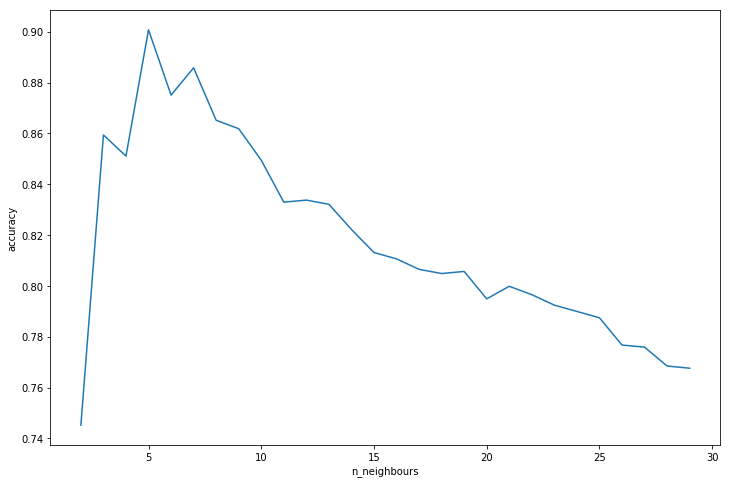

In [25]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))    

So, n_neighbours=5 is giving better accuracy as well as f1-score for our data.
So, with KNN Classification algorithm, I am able to achieve accuracy around 90% which is far better than my benchmark model.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
X=data[data.columns[:-1]]
y=data['class']
clf_A = DecisionTreeClassifier(random_state=0)
clf_A.fit(X_train,y_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pred=clf_A.predict(X_test)
clf_A.score(X_test,y_test)



0.9653179190751445

Finally I reached 96.5% accuracy.